gender:  male
Insuffisance pondérale
nombre d'individus:  20
hanche  0.8593188814888211
jambe:  0.9813941842049199
haut du corps:  0.9655148431333531
épaules:  0.9308810755551759
bras:  0.9856233784347554
cage thoracique: 0.8241487316431994


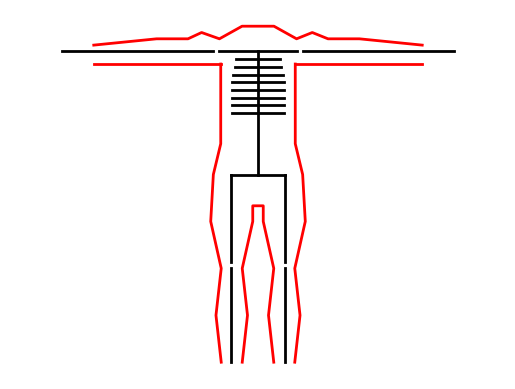

gender:  male
Corpulence normale
nombre d'individus:  2524
hanche  0.9499769587867353
jambe:  1.0022159970775593
haut du corps:  0.9852436632706708
épaules:  0.977710169696631
bras:  1.0001408426530194
cage thoracique: 0.9437109146680269


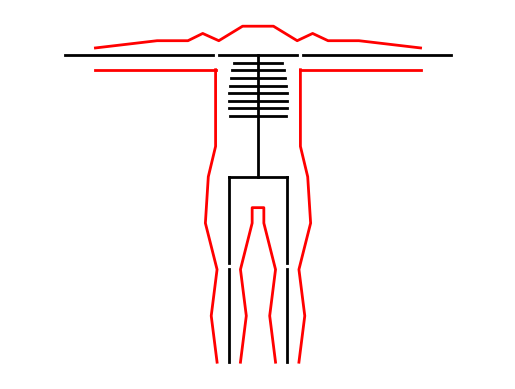

gender:  male
Pré-Obésité
nombre d'individus:  1866
hanche  1.0210290843957048
jambe:  0.9973999420142019
haut du corps:  1.005378056569939
épaules:  1.0116442683607492
bras:  0.9982693981632275
cage thoracique: 1.0281068371681723


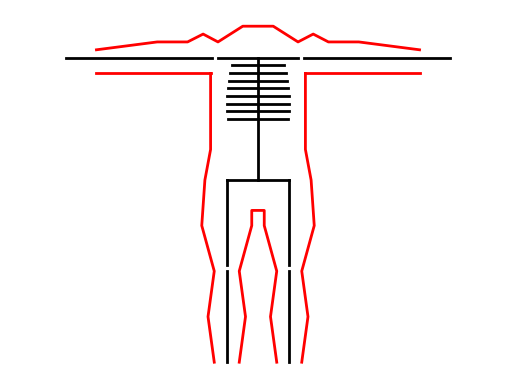

gender:  male
Obésité
nombre d'individus:  570
hanche  1.1575991349300334
jambe:  0.9993520138484938
haut du corps:  1.0489460411976377
épaules:  1.0630065007253362
bras:  1.0055462256184244
cage thoracique: 1.1634093308582922


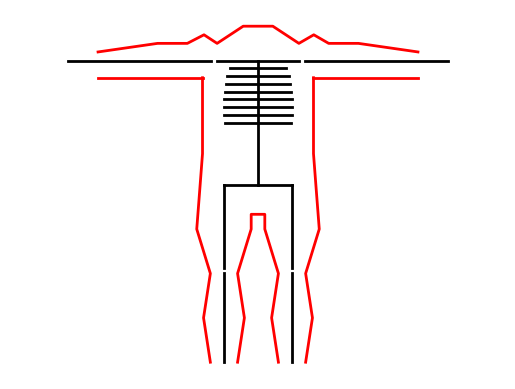

gender:  female
Insuffisance pondérale
nombre d'individus:  164
hanche  0.8615252454040493
jambe:  1.0329576874674118
haut du corps:  0.9718515433689157
épaules:  0.9497829621894652
bras:  1.0234499323925015
cage thoracique: 0.8487579132822206


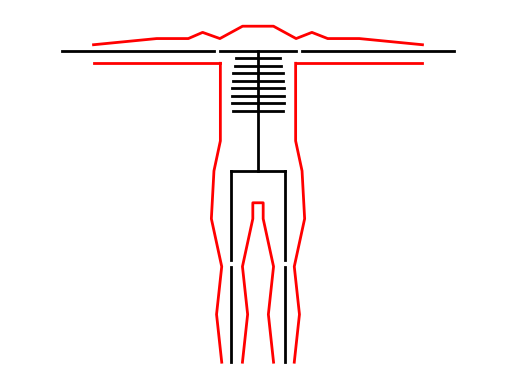

gender:  female
Corpulence normale
nombre d'individus:  2377
hanche  0.9439396496960597
jambe:  0.999678775777646
haut du corps:  0.9884930534651186
épaules:  0.9780540842409768
bras:  0.9989551565247937
cage thoracique: 0.9346200625512612


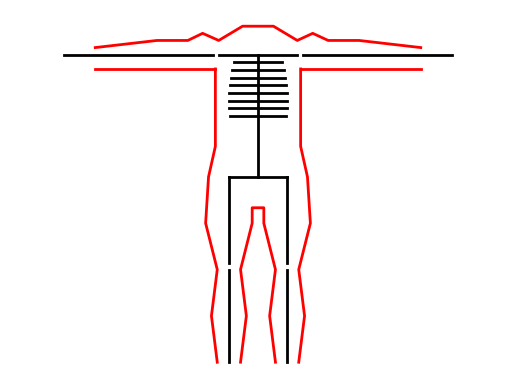

gender:  female
Pré-Obésité
nombre d'individus:  791
hanche  1.0319561392625274
jambe:  0.9878826670077401
haut du corps:  1.0019590492240087
épaules:  1.0125927190753836
bras:  0.9888877904574999
cage thoracique: 1.0401150007415765


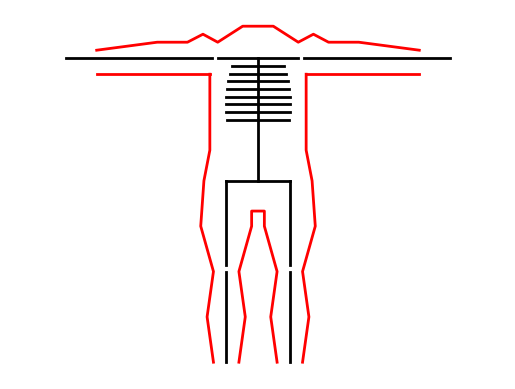

gender:  female
Obésité
nombre d'individus:  666
hanche  1.1962282376419562
jambe:  1.0074223718149509
haut du corps:  1.0456738000971768
épaules:  1.0757360287860325
bras:  1.011152495159628
cage thoracique: 1.2229442161423136


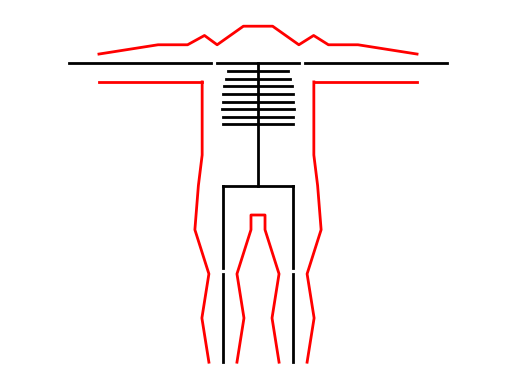

In [43]:
#### import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import pandas as pd



for genre in ["male", "female"]:
    for i in range(4):
        print("gender: ",genre)
        #Insuffisance pondérale : IMC en-dessous de 18.5
        #Corpulence normale : IMC entre 18.5 et 25
        #Pré-obésité : IMC entre 25 et 30
        #Obésité : IMC au-dessus de 30
        
        # Création de la figure
        fig, ax = plt.subplots()
        
        #Définition des différents paramètres de taille
        
        df = pd.read_csv("bodym.csv")
        df = df[df.gender == genre]
        
        df["IMC"] = df.weight_kg / (df.height_cm)**2 * 10000
    
        if i == 0:
            dfc = df[df.IMC < 18.5]
            print("Insuffisance pondérale")
        if i == 1:
            dfc = df[(df.IMC >= 18.5) & (df.IMC < 25)]
            print("Corpulence normale")
        if i == 2:
            dfc = df[(df.IMC >= 25) & (df.IMC < 30)]
            print("Pré-Obésité")
        if i == 3:
            dfc = df[df.IMC >= 30]
            print("Obésité")
    
        
    
        print("nombre d'individus: ", len(dfc))
        
        
        hc = dfc.hip.mean() / df.hip.mean()
        print("hanche ", hc)
        
        jambe = dfc["leg-length"].mean() / df["leg-length"].mean()
        print("jambe: ", jambe)
        
        haut = dfc["shoulder-to-crotch"].mean() / df["shoulder-to-crotch"].mean()
        print("haut du corps: ", haut)
        
        epaule = dfc["shoulder-breadth"].mean() / df["shoulder-breadth"].mean()
        print("épaules: ", epaule)
        
        stw = dfc["arm-length"].mean() / df["arm-length"].mean()
        print("bras: ", stw)
        
        wc = dfc["chest"].mean() / df["chest"].mean()
        print("cage thoracique:", wc)

        thigh  = dfc["thigh"].mean() / df["thigh"].mean()
        biceps = dfc["bicep"].mean() / df["bicep"].mean()
        wa = dfc["waist"].mean() / df["waist"].mean()
        
        # Définition des coordonnées des os
        bones = {'cuisse2' : ((hc, 3*jambe + 3*jambe), (hc, 3*jambe + 0.2)),
            'cuisse1' : ((-hc, 3*jambe + 3*jambe), (-hc, 3*jambe + 0.2)),
            'jambe1' : ((-hc, 3*jambe), (-hc, 0)),
            'jambe2' : ((hc, 3*jambe), (hc, 0)),
            'bassin' : ((-hc, 3*jambe + 3*jambe), (hc, 3*jambe + 3*jambe)),
            'colonne' : ((0,3*jambe + 3*jambe), (0,3*jambe + 3*jambe + 4*haut)),
            'épaule' : ((-1.3*epaule, 3*jambe + 3*jambe + 4*haut), (1.3*epaule, 3*jambe + 3*jambe + 4*haut)),
            'bras1' : ((-1.3*epaule - 0.2, 3*jambe + 3*jambe + 4*haut), (-1.3*epaule - 5 * stw, 3*jambe + 3*jambe + 4*haut )),
            'bras2' : ((1.3*epaule + 0.2, 3*jambe + 3*jambe + 4*haut), (1.3*epaule + 5 * stw, 3*jambe + 3*jambe + 4*haut)),
                }
        # Définition de l'enveloppe
        enveloppe = {'brashaut' : (3*jambe + 3*jambe + 4*haut + biceps*np.array([0.25,0.375,0.5,0.5,0.75,0.5,1,1,0.5,0.75,0.5,0.5,0.375,0.25]),
                      np.array([-1.3*epaule +stw*-4,-1.3*epaule +stw*-3,-1.3*epaule +stw*-2,-1.3*epaule +stw*-1,-1.3**epaule +stw*-0.5,-1.3*epaule, -0.5,0.5, 1.3*epaule, 1.3*epaule +stw*0.5, 1.3*epaule +stw*1,1.3*epaule +stw*2,1.3*epaule +stw*3,1.3*epaule +stw*4])),
                     'brasbas1' : (3*jambe + 3*jambe + 4*haut + biceps*np.array([-0.5,-0.5]),
                        np.array([-1.3*epaule +stw*-4, -1.5*wa])),
                     'brasbas2' : (3*jambe + 3*jambe + 4*haut + biceps*np.array([-0.5,-0.5]),
                        np.array([1.3*epaule +stw*4, 1.5*wa])),
                     'cotegauche' : (np.array([3*jambe + 3*jambe + 4*haut + biceps*-0.5, 3*jambe + 3*jambe + haut,   6*jambe, 4.5*jambe, 3*jambe,1.5*jambe,0]) ,np.array([-1.5*wa,-1.5*wa,-1.7*thigh,-1.8*thigh, -1.4*thigh, -1.6*thigh, -1.4*thigh])),
                     'cotedroit' : (np.array([3*jambe + 3*jambe + 4*haut + biceps*-0.5, 3*jambe + 3*jambe + haut,   6*jambe, 4.5*jambe, 3*jambe,1.5*jambe,0]) ,np.array([1.5*wa,1.5*wa,1.7*thigh, 1.8*thigh, 1.4*thigh, 1.6*thigh, 1.4*thigh])),
                     'crotch' : (jambe*np.array([0, 1.5, 3, 4.5, 5, 5, 4.5, 3, 1.5,0]), thigh*np.array([-0.6,-0.4,-0.6,-0.2,-0.2,0.2,0.2,0.6,0.4,0.6]))
                    }   

        for bone_name, bone_coords in enveloppe.items():
            ax.plot(bone_coords[1], bone_coords[0], lw=2, color='red')
        
        # Dessin des os
        for bone_name, bone_coords in bones.items():
            x_coords = [bone_coords[0][0], bone_coords[1][0]]
            y_coords = [bone_coords[0][1], bone_coords[1][1]]
            ax.plot(x_coords, y_coords, lw=2, color='black')
        
        for i in range(8):
            x_coords = [-(-((1)/(144)) *(i-2)**(2)+1)*wc,(-((1)/(144)) *(i-2)**(2)+1)*wc]
            y_coords = [3*jambe + 3*jambe + (2+i/4)*haut, 3*jambe + 3*jambe + (2+i/4)*haut]
            ax.plot(x_coords, y_coords, lw=2, color='black')
        # Réglages des limites et suppression des axes
        ax.set_xlim(-4, 4)
        ax.set_ylim(0, 12)
        ax.axis('off')
        plt.axis('equal') 
        # Affichage du squelette
        plt.show()
